# KPDVE lists

In [1]:
import pt_keypattern
import harmony_state
import pt_utils
import pt_musicutils
import pt_naming_conventions
import jupyter_pt_tools as jpt_pt
import IPython.display as ipd

harmony = harmony_state.harmony_state()

## All possibilities... which are not as many as you might think... and reachable

Individual pitches are useless without context. 

Chords are almost as bad, taken alone. 

But combinations of notes have more readily definable implications.

Once we hear a chord, we begin to narrow down the possibilities of what sounds might come next, and what sorts of sounds likely preceded it. 

For example, the following example finds the modes which contain a C Major chord, and define its function.

This process requires only logic operators.

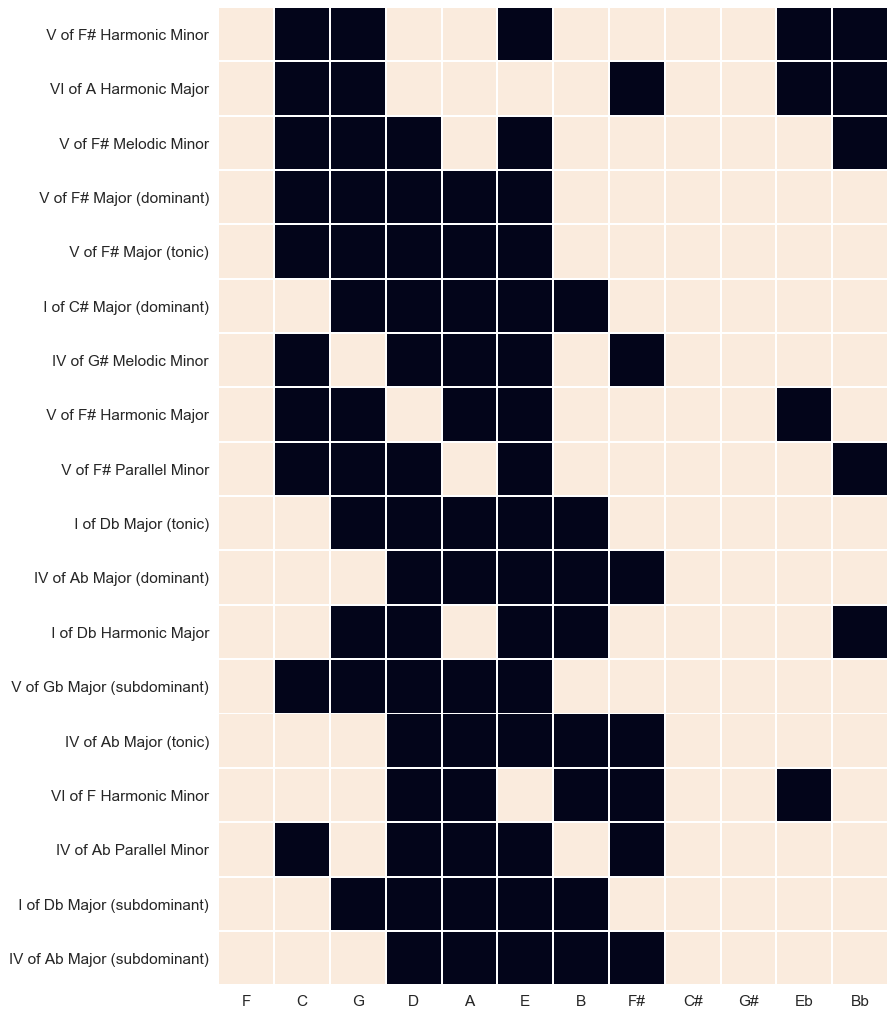

In [14]:
CM_triad = 0b10001001000
harmony.change_notegroup(CM_triad)

binary_list = [pt_keypattern.get_binary_KP(kpdve[0], kpdve[1]) for kpdve in harmony.current_kpdve_list]
possible_states = [harmony_state.harmony_state(kpdve) for kpdve in harmony.current_kpdve_list]

tonics = [a_state.current_function_string() + " of " + a_state.current_conv_mode_complete() for a_state in possible_states]

jpt_pt.multiple_notegroup_heatmap(binary_list, yticks=tonics)
patterns = [mode + disp for mode, disp in [pt_musicutils.get_tonic_mode_disp_tuple(kpdve) for kpdve in harmony.current_kpdve_list]]
sequence = jpt_pt.link_ordered_wavestep_sequences(patterns, duration=10)
sequence += jpt_pt.notegroup_wavepile(CM_triad, duration=10)

ipd.Audio(sequence, rate=44100)

It's a lot to remember, it would seem. But for a computer, it's as close to nothing as you can get: not a single bit of arithmetic, only logic operations.

## Finding Chord Function: Backpropagation in miniature, and self-tying knots.

What results is a dialogue between the unity of a single note and the unity of a seven-note mode. 

To activate this dialogue we require chords, reaching betwee the singularity of a note and the singularity of a mode. 

---

We find chords by measuring the *easiest* way to reach them from whatever sounds preceded them. We do this by considering each note as a possible root in each possible key. The closest key and pattern, reachable in the fewest number of steps, yields the strongest candidate for the chord that functions in our ear. 

When our ears are active and our minds are lazy, we hear harmony.